# Understanding & Cleaning the Test Data

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/test.csv',parse_dates=['Flight_Date','Request_Date'])

In [4]:
data

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28 11:00:00+00:00,2019-07-29,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28 11:00:00+00:00,2019-07-29,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28 11:00:00+00:00,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28 23:00:00+00:00,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28 11:00:00+00:00,2019-07-30,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
5,2019-07-28 23:00:00+00:00,2019-07-30,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
6,2019-07-28 11:00:00+00:00,2019-07-30,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
7,2019-07-28 23:00:00+00:00,2019-07-30,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
8,2019-07-29 11:00:00+00:00,2019-07-30,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
9,2019-07-28 11:00:00+00:00,2019-07-30,22,2019-07-30 FR 8545,SXF-STN,FR 8545,50.99,€


In [5]:
data['Departure_hour'] = pd.to_numeric(data['Departure_hour'])
data['Request_Date'] = data['Request_Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
data['Flight_Date'] = data['Flight_Date'] + pd.to_timedelta(data['Departure_hour'], 'h')

In [6]:
data['Request_Date'] = pd.to_datetime(data['Request_Date'])
data

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28 11:00:00,2019-07-29 18:00:00,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28 11:00:00,2019-07-29 22:00:00,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28 11:00:00,2019-07-30 06:00:00,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28 23:00:00,2019-07-30 06:00:00,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28 11:00:00,2019-07-30 10:00:00,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
5,2019-07-28 23:00:00,2019-07-30 10:00:00,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
6,2019-07-28 11:00:00,2019-07-30 18:00:00,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
7,2019-07-28 23:00:00,2019-07-30 18:00:00,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
8,2019-07-29 11:00:00,2019-07-30 18:00:00,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
9,2019-07-28 11:00:00,2019-07-30 22:00:00,22,2019-07-30 FR 8545,SXF-STN,FR 8545,50.99,€


In [7]:
Duration_Time = data['Flight_Date'] - data['Request_Date']
Duration_Time = Duration_Time.apply(lambda x: x.total_seconds())     
Duration_Time = divmod(Duration_Time, 3600)[0]
data.insert(2, "Duration_Time", Duration_Time, True)

In [8]:
data

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28 11:00:00,2019-07-29 18:00:00,31.0,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28 11:00:00,2019-07-29 22:00:00,35.0,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28 11:00:00,2019-07-30 06:00:00,43.0,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28 23:00:00,2019-07-30 06:00:00,31.0,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28 11:00:00,2019-07-30 10:00:00,47.0,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
5,2019-07-28 23:00:00,2019-07-30 10:00:00,35.0,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
6,2019-07-28 11:00:00,2019-07-30 18:00:00,55.0,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
7,2019-07-28 23:00:00,2019-07-30 18:00:00,43.0,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
8,2019-07-29 11:00:00,2019-07-30 18:00:00,31.0,18,2019-07-30 FR 146,SXF-STN,FR 146,152.99,€
9,2019-07-28 11:00:00,2019-07-30 22:00:00,59.0,22,2019-07-30 FR 8545,SXF-STN,FR 8545,50.99,€


The average price for the period between request and flight


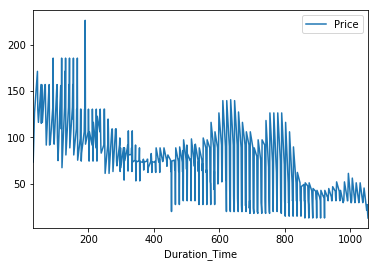

In [9]:
print("The average price for the period between request and flight")
fig, ax = plt.subplots()
df = data.groupby(['Duration_Time'])[['Price']].median().plot(ax=ax)
ax.legend()
plt.show()

The average price for the time of the flight


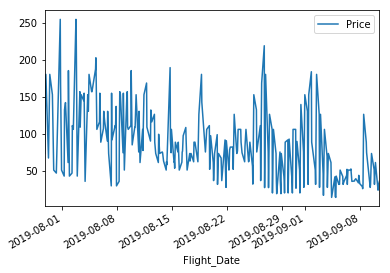

In [10]:
print("The average price for the time of the flight")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date'],)[['Price']].median().plot(ax=ax)
ax.legend()
plt.show()

The average price for the time of the flight and same route


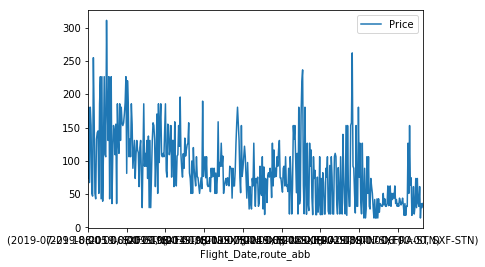

In [11]:
print("The average price for the time of the flight and same route")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date','route_abb'],)[['Price']].median().plot(ax=ax)
ax.legend()
plt.show()

Plot how many flights per route


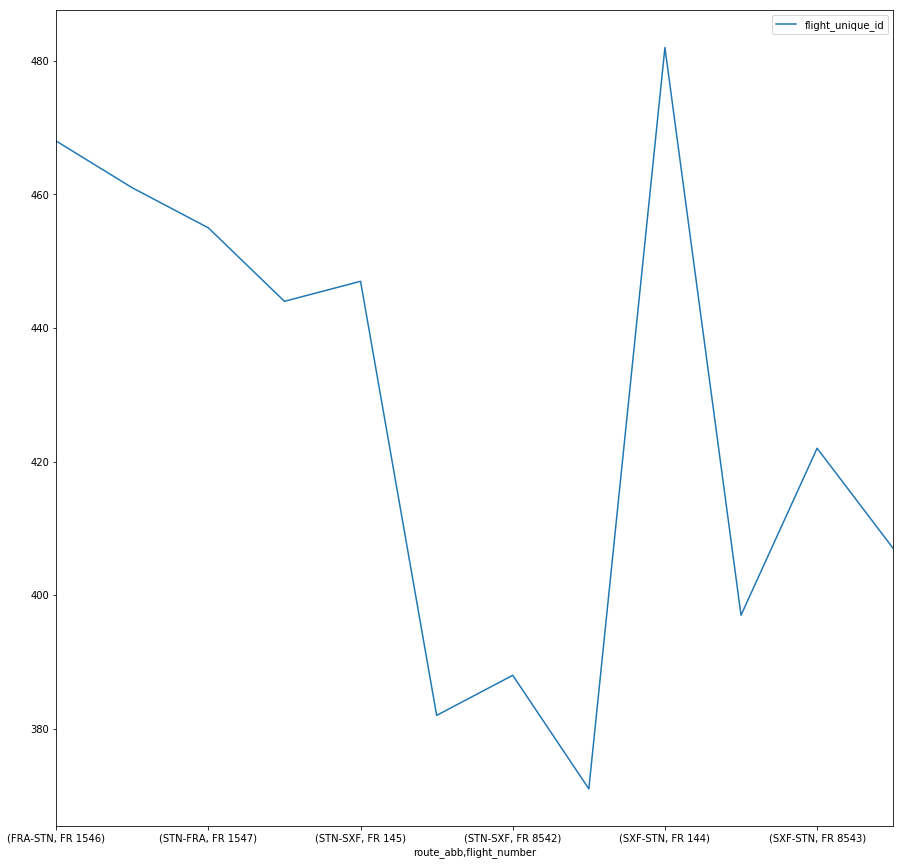

In [12]:
print("Plot how many flights per route")
fig, ax = plt.subplots()
df = data.groupby(['route_abb','flight_number']).count()['flight_unique_id'].plot(ax=ax, figsize=[15, 15])
ax.legend()
plt.show()

In [13]:
data = pd.read_csv('data/converted_train_2020_06_03_16-14-12.csv',parse_dates=['Flight_Date','Request_Date'])

In [14]:
data

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price,price_in_eur,min_future_price_in_eur,Request_Weekday,Request_AM_PM
0,0,2019-06-03 11:00:00,2019-06-05 19:00:00,56.0,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07,208.070000,259.070000,Monday,AM
1,1,2019-06-03 23:00:00,2019-06-05 19:00:00,44.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Monday,PM
2,2,2019-06-04 11:00:00,2019-06-05 19:00:00,32.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,AM
3,3,2019-06-03 11:00:00,2019-06-05 21:00:00,58.0,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37,106.466899,186.536287,Monday,AM
4,4,2019-06-03 23:00:00,2019-06-05 21:00:00,46.0,21,2019-06-05 FR 147,STN-SXF,FR 147,223.37,£,223.37,186.536287,186.536287,Monday,PM
5,5,2019-06-04 11:00:00,2019-06-05 21:00:00,34.0,21,2019-06-05 FR 147,STN-SXF,FR 147,223.37,£,223.37,186.536287,186.536287,Tuesday,AM
6,6,2019-06-03 11:00:00,2019-06-05 22:00:00,59.0,22,2019-06-05 FR 8545,SXF-STN,FR 8545,22.17,€,22.17,22.170000,22.170000,Monday,AM
7,7,2019-06-03 23:00:00,2019-06-05 22:00:00,47.0,22,2019-06-05 FR 8545,SXF-STN,FR 8545,22.17,€,28.55,22.170000,28.550000,Monday,PM
8,8,2019-06-04 11:00:00,2019-06-05 22:00:00,35.0,22,2019-06-05 FR 8545,SXF-STN,FR 8545,28.55,€,50.99,28.550000,50.990000,Tuesday,AM
9,9,2019-06-03 23:00:00,2019-06-06 06:00:00,55.0,6,2019-06-06 FR 144,SXF-STN,FR 144,73.43,€,61.19,73.430000,61.190000,Monday,PM


The average price for the period between request and flight in euro


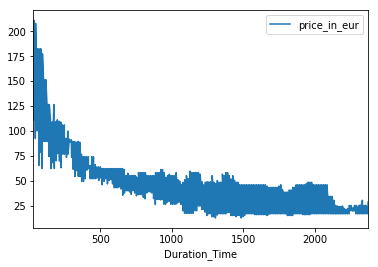

In [15]:
print("The average price for the period between request and flight in euro")
fig, ax = plt.subplots() 
df = data.groupby(['Duration_Time'])[['price_in_eur']].median().plot(ax=ax)
ax.legend()
plt.show()

The average price for the time of the flight and same route in euro


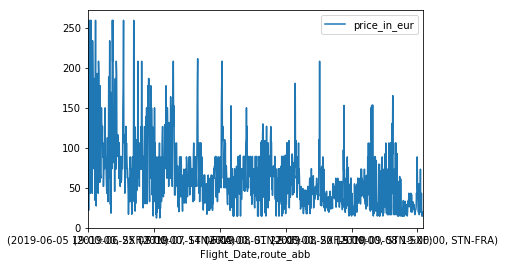

In [16]:
print("The average price for the time of the flight and same route in euro")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date','route_abb'],)[['price_in_eur']].median().plot(ax=ax)
ax.legend()
plt.show()

# --------------------------------------------------------------------------------------------------------------